# Make shapefile out of polygons that ran

This notebook checks whether the ramsar wetland polygon drill ran on all the polygons in the input shapefile.

_inputs_  
- a csv saved from the QGIS attribute table of the original shapefile
- path to the output directory containing results for each shapefile
- somewhere to save the output shapefile

load some modules

In [56]:
import xarray as xr
import pandas as pd
import csv
import os
import fiona
from shapely.geometry import shape
import geopandas as gpd
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap

where is my csv?

In [57]:
path_to_csv_attribute_table = '/g/data/r78/rjd547/Ramsar_Wetlands/exploded_ramsar_attribute_table.csv'

read in the csv using pandas

In [58]:
ramsar_exploded = pd.read_csv(path_to_csv_attribute_table)

read filenames from directory, add to dataframe, and compare against ramsar list


In [59]:
#make an empty list of the files that ran
ramsars_run = []
#for each file in the output directory
for file in os.listdir('/g/data/r78/rjd547/Ramsar_Wetlands/Ramsar_Outputs_4_v2/'):
    #if it's a csv file
    if file.endswith(".csv"):
        #add it to our list
        ramsars_run.append(file)  

look at the first five failed polyons

In [60]:
ramsars_run[0:5]

['Vasse-Wonnerup_System-Vasse-Wonnerup_System-WA-117.csv',
 'Ashmore_Reef_National_Nature_Reserve-Ashmore_Reef_National_Nature_Reserve-EXT-227.csv',
 'Moreton_Bay-Moreton_Bay-QLD-146.csv',
 'NSW_Central_Murray_State_Forests-Koondrook_Forest_Group-NSW-236.csv',
 'Moreton_Bay-Moreton_Bay-QLD-140.csv']

use the index of the wetland shapefile to get all the original shapefile indices

In [61]:
#get the shapefile index as a list
ramsar_exploded_index = ramsar_exploded.index.tolist()

use some string manipulation to get the index of the missing polgons out of the list of files in the output directory

In [62]:
#get list of runs
run_list = []
for i in ramsars_run:
    i = i.split('-') #break up filename
    i = i[-1] #get last bit
    i = i.split('.')[0]
    i =int(i)
    run_list.append(i)

use set math to find which indexes are present in the original list and not the output directory

In [63]:
missing_runs = set(ramsar_exploded_index) - set(run_list)
print(missing_runs)

{228, 229, 230, 231, 105, 266, 12, 125, 185, 90, 93, 94}


In [64]:
#turn the set of missing runs back into a list
missing_runs = list(missing_runs)

In [65]:
# for wetland_number in missing_runs:
#     print (f'\'{ramsar_exploded.loc[wetland_number][3]}, OBJECTID:{ramsar_exploded.loc[wetland_number][0]}, ID:{ramsar_exploded.loc[wetland_number].name} \',')

In [66]:
#the original shapefile
ramsar_shapes =  '/g/data/r78/rjd547/Ramsar_Wetlands/shapefiles/Ramsar_exploded3.shp'

open the original shapefile. Use the index ['id'] of the missing runs to select the polygons from the shapefile. Write the selected missing polygons out into a new shapefile.

In [67]:
with fiona.open(ramsar_shapes) as inshape:
    meta=inshape.meta
    with fiona.open('/g/data/r78/rjd547/Ramsar_Wetlands/ramsar_notrun_v1.shp','w',**meta) as outshape:
        for feature in inshape:
                if int(feature['id']) in missing_runs:
                    print(feature['properties']['WETLAND_NA'])   
                    outshape.write(feature)
                   
                    

Kakadu_National_Park
The_Coorong,_and_Lakes_Alexandrina_and_Albert_Wetland
Coongie_Lakes
Macquarie_Marshes_Nature_Reserve
Eighty-mile_Beach
Hosnies_Spring
Pulu_Keeling_National_Park
Coral_Sea_Reserves_(Coringa-Herald_and_Lihou_Reefs_and_Cays)
Coral_Sea_Reserves_(Coringa-Herald_and_Lihou_Reefs_and_Cays)
Elizabeth_and_Middleton_Reefs_Marine_National_Nature_Reserve
The_Dales
Peery


In [68]:
missing_runs

[228, 229, 230, 231, 105, 266, 12, 125, 185, 90, 93, 94]

open the original shapefile. Use the index ['id'] of the runs to select the polygons from the shapefile. Write the selected missing polygons out into a new shapefile.

In [69]:
#this time we just create a json file of the actual runs
with fiona.open(ramsar_shapes) as inshape:
    meta=inshape.meta
    with fiona.open('/g/data/r78/rjd547/Ramsar_Wetlands/shapefiles/Ramsar_exploded4.shp','w',**meta) as outshape:
        for feature in inshape:
                if int(feature['id']) in run_list:
                    print(feature['properties']['WETLAND_NA'])   
                    outshape.write(feature)
                   
                    

Cobourg_Peninsula
Cobourg_Peninsula
Cobourg_Peninsula
Cobourg_Peninsula
Cobourg_Peninsula
Cobourg_Peninsula
Cobourg_Peninsula
Cobourg_Peninsula
Cobourg_Peninsula
Cobourg_Peninsula
Cobourg_Peninsula
Cobourg_Peninsula
Kakadu_National_Park
Kakadu_National_Park
Moulting_Lagoon
Logan_Lagoon
Lavinia
Pitt_Water-Orielton_Lagoon
Pitt_Water-Orielton_Lagoon
Pitt_Water-Orielton_Lagoon
Apsley_Marshes
East_Coast_Cape_Barren_Island_Lagoons
Flood_Plain_Lower_Ringarooma_River
Jocks_Lagoon
Interlaken_(Lake_Crescent)
Little_Waterhouse_Lake
Corner_Inlet
Barmah_Forest
Gunbower_Forest
Lake_Arawak
Lake_Bitterang
Lake_Brockie
Lake_Bulla
Lake_Cantala
Lake_Hattah
Lake_Konardin
Lake_Kramen
Lake_Lockie
Lake_Mournpall
Lake_Yelwell
Lake_Yerang
Cemetery_Swamp
Cemetery_Swamp
Fosters_Swamp
Hird_Swamp
Johnson_Swamp
Kangaroo_Lake
Lake_Charm
Lake_Cullen
Lake_Kelly
Lake_Tutchewop
Lake_William
Reedy_Lake
Stevensons_Swamp
The_Marshes
Town_Swamp
Corio_Bay
Lake_Connewarre
Mud_Island
Point_Cook
Swan_Bay
Werribee_River
Western_

open the new shapefile to check what was written out as a new shapefile.

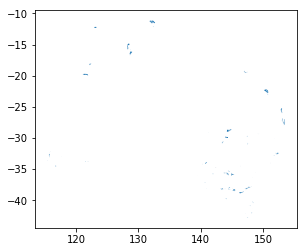

In [71]:
outshape_written = gpd.read_file('/g/data/r78/rjd547/Ramsar_Wetlands/shapefiles/Ramsar_exploded4.shp')
outshape_written.plot()
plt.show()